In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Load data
df = pd.read_csv("/Users/naveenapaleti/Projects/ShopTrack360/data/cleaned_ecommerce_data.csv")

### 1. Sales Overview

In [8]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

### Categorical Analysis

In [11]:
print("Unique Countries:", df["Country"].nunique())
print("Top Countries:")
print(df["Country"].value_counts().head())

Unique Countries: 37
Top Countries:
Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64


In [14]:
print("Unique Products:", df["Description"].nunique())
print("Top Products:")
print(df["Description"].value_counts().head())

Unique Products: 3877
Top Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
Name: count, dtype: int64


In [15]:
print("Unique Customers:", df["CustomerID"].nunique())

Unique Customers: 4338


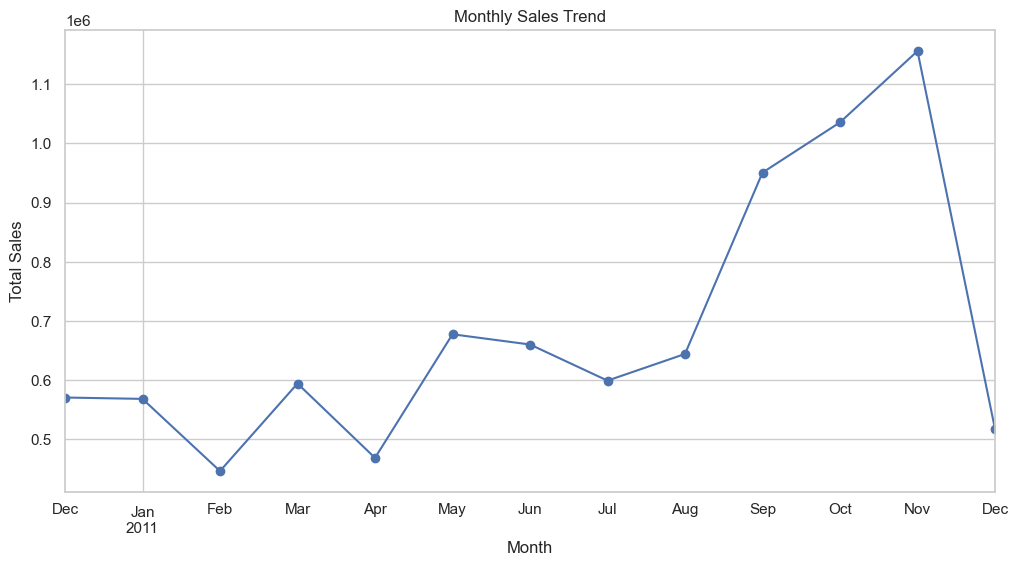

In [17]:
# Time-based Analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Weekday'] = df['InvoiceDate'].dt.day_name()

monthly_sales = df.groupby("InvoiceMonth")["TotalPrice"].sum()
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

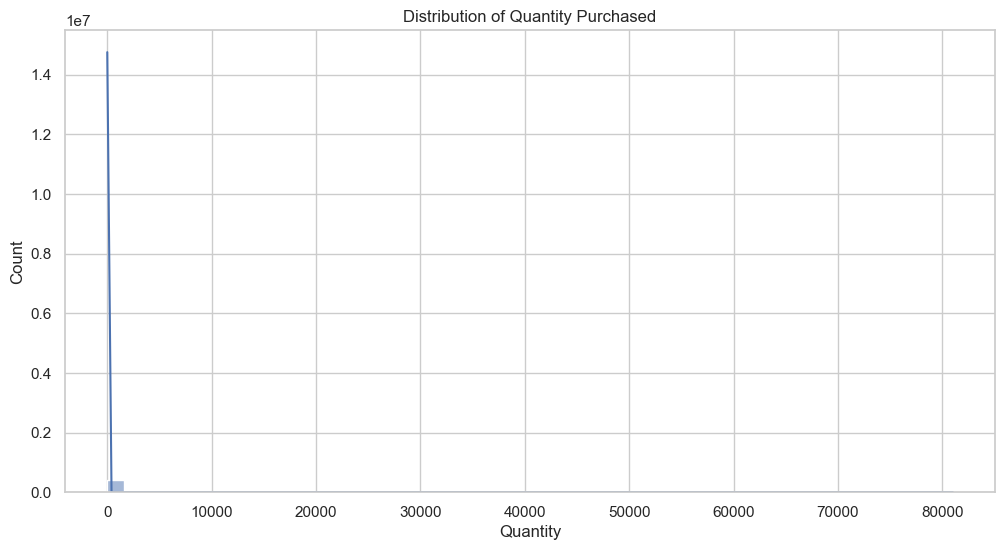

In [18]:
# Quantity Distribution
sns.histplot(df["Quantity"], bins=50, kde=True)
plt.title("Distribution of Quantity Purchased")
plt.show()

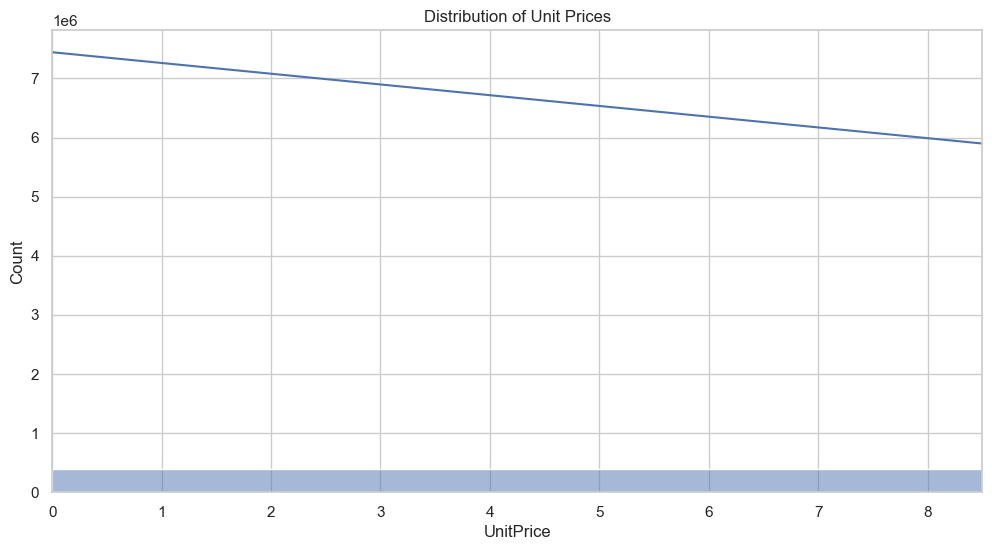

In [19]:
# Unit Price Distribution
sns.histplot(df["UnitPrice"], bins=50, kde=True)
plt.title("Distribution of Unit Prices")
plt.xlim(0, df["UnitPrice"].quantile(0.95))
plt.show()

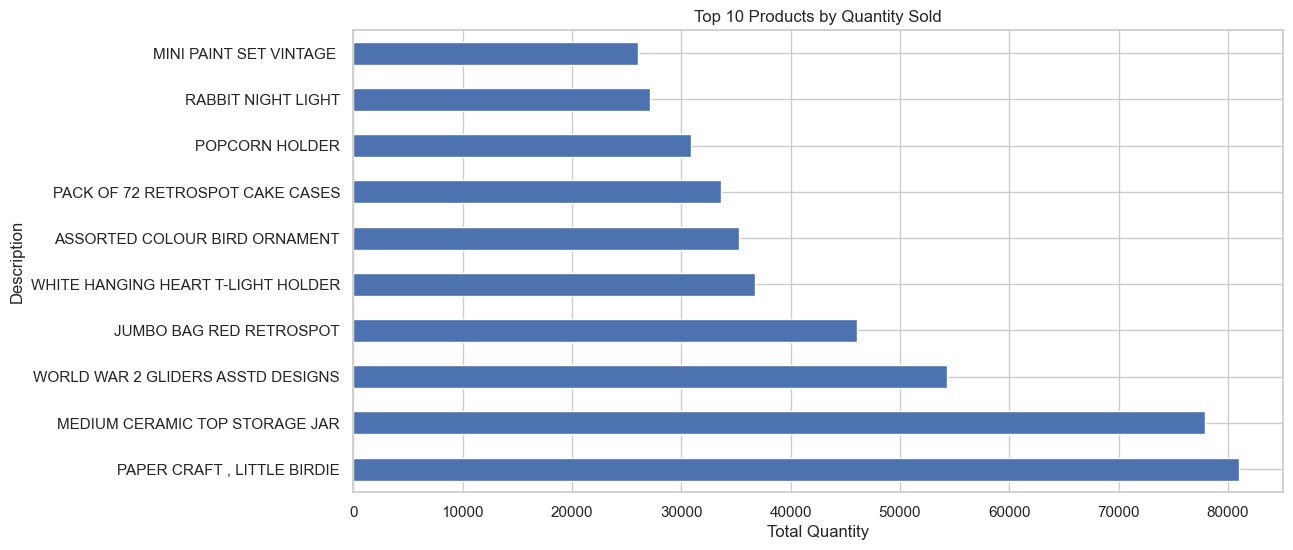

In [20]:
# Top 10 Selling Products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", title="Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.show()

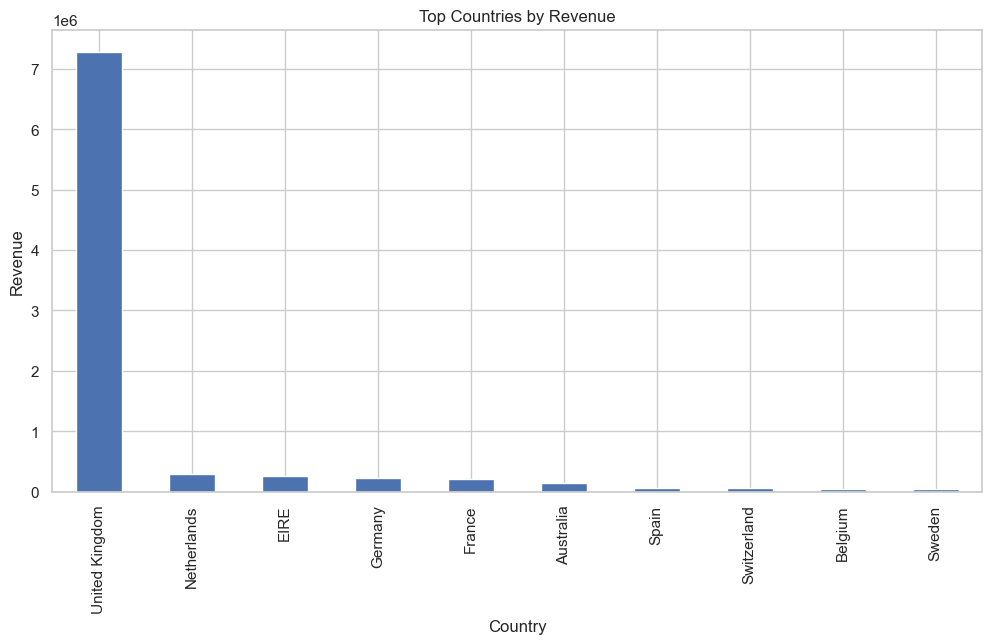

In [21]:
# Top Countries by Revenue
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind="bar", title="Top Countries by Revenue")
plt.ylabel("Revenue")
plt.show()

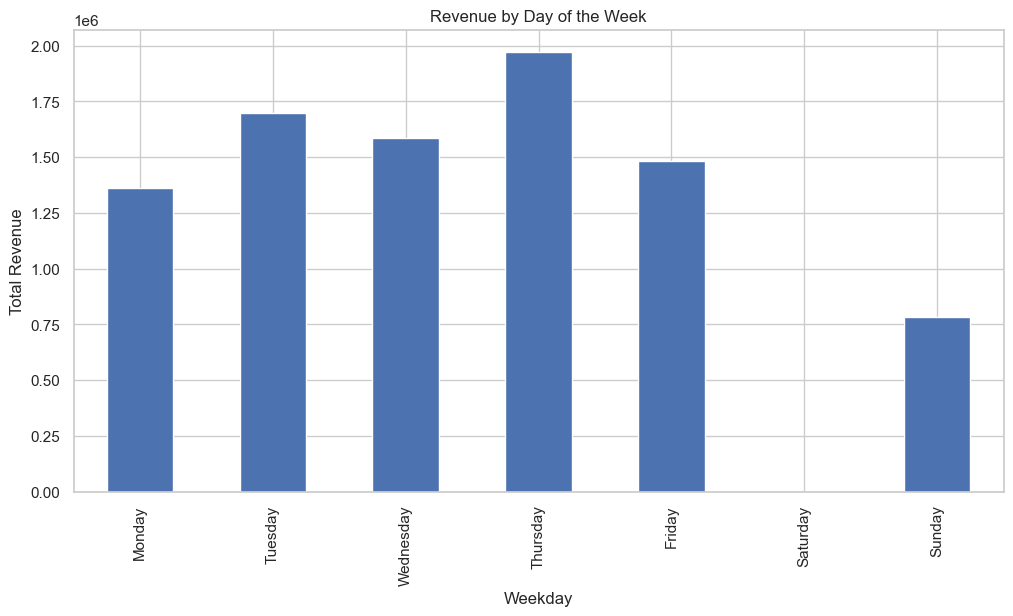

In [22]:
# Day of Week Sales
weekday_sales = df.groupby("Weekday")["TotalPrice"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
weekday_sales.plot(kind="bar", title="Revenue by Day of the Week")
plt.ylabel("Total Revenue")
plt.show()

<Axes: title={'center': 'Revenue by Hour of Day'}, xlabel='Hour'>

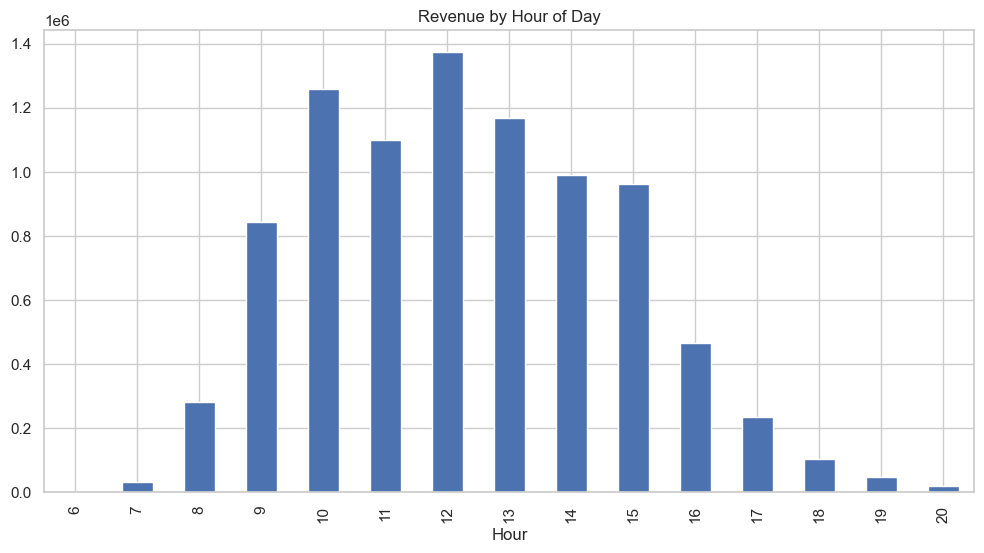

In [29]:
df['Hour'] = df['InvoiceDate'].dt.hour

# Hourly sales
df.groupby('Hour')['TotalPrice'].sum().plot(kind='bar', title='Revenue by Hour of Day')

In [24]:
# RFM Features
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"
})
print("RFM Summary:\n", rfm.describe())

RFM Summary:
            Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     306.482500
50%      51.000000     2.000000     668.570000
75%     142.000000     5.000000    1660.597500
max     374.000000   209.000000  280206.020000


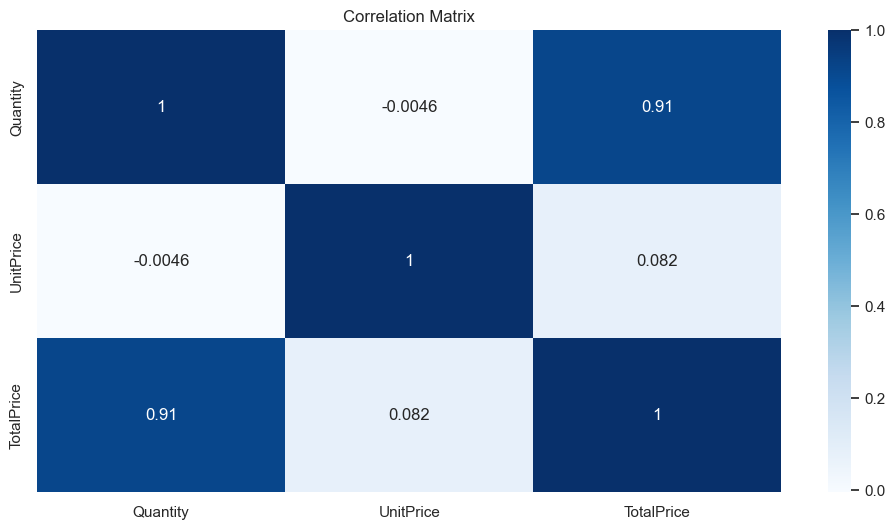

In [25]:
# Correlation Heatmap
numeric_cols = ["Quantity", "UnitPrice", "TotalPrice"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='InvoiceDate'>

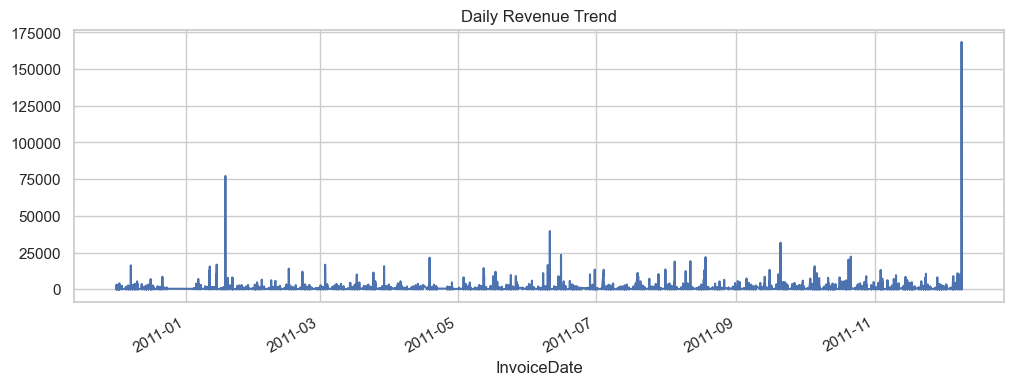

In [28]:
# Revenue
daily_sales = df.groupby('InvoiceDate')['TotalPrice'].sum()

# Plot
daily_sales.plot(figsize=(12, 4), title='Daily Revenue Trend')

In [30]:
customer_summary = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'StockCode': 'nunique'
}).rename(columns={
    'InvoiceNo': 'NumTransactions',
    'TotalPrice': 'TotalSpent',
    'StockCode': 'UniqueProducts'
})

customer_summary.describe()


,NumTransactions,TotalSpent,UniqueProducts
count,4338.000000,4338.000000,4338.000000
mean,4.272015,2048.688081,61.501153
std,7.697998,8985.230220,85.366768
min,1.000000,3.750000,1.000000
25%,1.000000,306.482500,16.000000
50%,2.000000,668.570000,35.000000
75%,5.000000,1660.597500,77.000000
max,209.000000,280206.020000,1787.000000


In [32]:
customer_summary.to_csv("/Users/naveenapaleti/Projects/ShopTrack360/data/customer_summary.csv")